# Section 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session

# Load the data
nepse_data_path = "NEPSE.csv"  # Update the path if necessary
nepse = pd.read_csv(nepse_data_path)


# Section 2: Data Preprocessing

In [2]:
# Data preprocessing
nepse["Date"] = pd.to_datetime(nepse["Date"])
nepse.set_index("Date", inplace=True)
nepse['Volume'] = nepse['Volume'].str.replace(',', '').astype(float)
nepse["Tomorrow"] = nepse["Close"].shift(-1)
nepse["Target"] = (nepse["Tomorrow"] > nepse["Close"]).astype(int)
nepse.drop(columns=['Symbol', 'Percent Change', 'Tomorrow'], inplace=True)
nepse.fillna(method='ffill', inplace=True)

X = nepse.drop(columns=['Target'])
y = nepse['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)


C:\Users\himal\AppData\Local\Temp\ipykernel_27224\1687648677.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nepse.fillna(method='ffill', inplace=True)


# Section 3: Build and Train Dense Neural Network Model


In [3]:
# Clear any previous model from memory
clear_session()

# Define the dense neural network architecture
model_dense = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the dense model
model_dense.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the dense model
history_dense = model_dense.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5591 - val_loss: 0.7366 - val_accuracy: 0.4121
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5920 - val_loss: 0.7279 - val_accuracy: 0.4396
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5920 - val_loss: 0.7067 - val_accuracy: 0.4560
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5810 - val_loss: 0.6959 - val_accuracy: 0.4725
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5907 - val_loss: 0.6808 - val_accuracy: 0.5879
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6003 - val_loss: 0.6688 - val_accuracy: 0.5989
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6030 - val_loss: 0.6643 - val_accuracy: 0.5989
Epoch 8/100
2

# Section 4: Evaluate Dense Neural Network Model

In [4]:
# Evaluate the dense model on the test set
test_loss, test_acc = model_dense.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy for Dense Model: {test_acc*100:.2f}%")

8/8 [==============================] - 0s 759us/step - loss: 0.8686 - accuracy: 0.5833
Test Accuracy for Dense Model: 58.33%


# Section 5: Plot Training History for Dense Model

# Part 3: Prepare Data for LSTM


In [5]:
# Helper function to create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:(i + sequence_length)]
        sequences.append(sequence)
    return np.array(sequences)

# Define sequence length and create sequences
sequence_length = 10
X_train_seq = create_sequences(X_train, sequence_length)
X_test_seq = create_sequences(X_test, sequence_length)

# Adjust y_train and y_test for LSTM
y_train_seq = y_train[sequence_length:]
y_test_seq = y_test[sequence_length:]


Part 4: Build and Train LSTM Model


In [6]:
# Clear any previous session
clear_session()

# Define LSTM model architecture
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[1])),
    Dropout(0.5),
    LSTM(50),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/100
23/23 [==============================] - 2s 25ms/step - loss: 0.6908 - accuracy: 0.5514 - val_loss: 0.6863 - val_accuracy: 0.4889
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6763 - accuracy: 0.5944 - val_loss: 0.6808 - val_accuracy: 0.5333
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6712 - accuracy: 0.6125 - val_loss: 0.6833 - val_accuracy: 0.5000
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6683 - accuracy: 0.5944 - val_loss: 0.6734 - val_accuracy: 0.5778
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6671 - accuracy: 0.6083 - val_loss: 0.6751 - val_accuracy: 0.5778
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6700 - accuracy: 0.5944 - val_loss: 0.6716 - val_accuracy: 0.5889
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.6181 - val_loss: 0.6771 - val_accuracy: 0.5722
Epoch 8/100


7/7 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5413
Test Accuracy: 54.13%


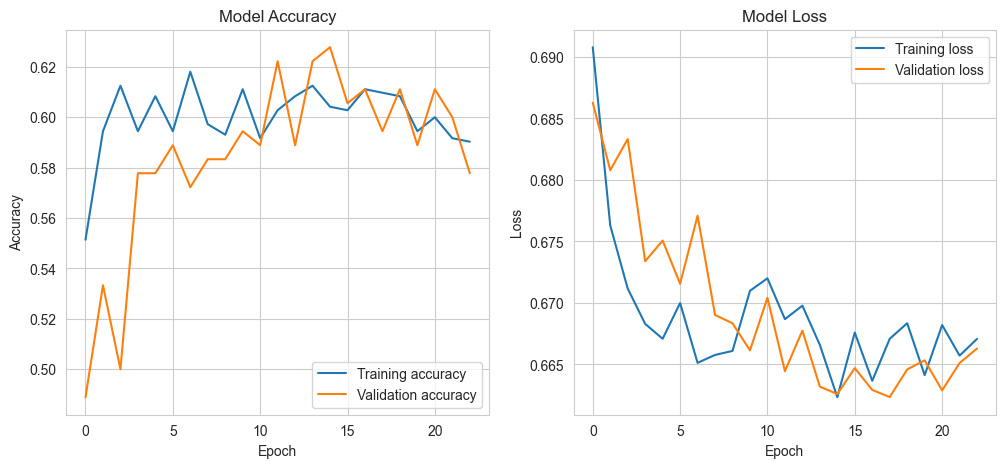

In [7]:
# Evaluate the LSTM model on the test set
# Evaluate the LSTM model on the test set
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


7/7 [==============================] - 0s 2ms/step


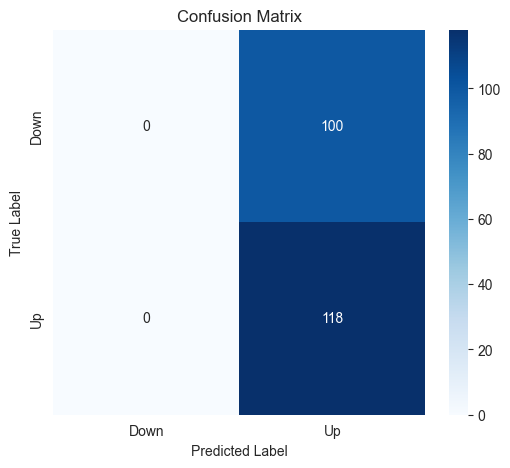

True Positives (Correctly predicted up movements): 118
True Negatives (Correctly predicted down movements): 0


In [13]:
# Predict and create a confusion matrix
predictions = model.predict(X_test_seq)
predictions_copy = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
cm = confusion_matrix(y_test_seq, predictions_copy)
true_positives = cm[1, 1]

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"True Positives (Correctly predicted up movements): {true_positives}")
print(f"True Negatives (Correctly predicted down movements): {cm[0, 0]}")